###### Inicialização

In [1]:
!pip install meteostat yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 KB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 KB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 KB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 52.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 6.5 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
   

In [2]:
import numpy as np
import pandas as pd
from pandas_datareader import data as pdr

from datetime import datetime, date
import matplotlib.pyplot as plt
from meteostat import Point, Daily, Hourly
plt.rcParams["figure.figsize"] = (28,6)

import yfinance as yf
yf.pdr_override()

In [3]:
SMALL_SIZE = 14
MEDIUM_SIZE = 18
BIGGER_SIZE = 24

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

# Análise de Séries temporais (Sessão 2)

## Tipos de Séries Temporais

In [4]:
start = datetime(2020, 1, 1)
end = datetime(2022, 10, 31)

location = Point(-15.7797, -47.9297) #Brasília
location2 = Point(-11.0056387, -37.2432436) #Aracaju
location3 = Point(-30.1084987, -51.3172276) #Porto Alegre

#Capturando os dados
brasilia, aracaju, poa = Daily(location, start, end), Daily(location2, start, end), Daily(location3, start, end)
serie_brasilia, serie_aracaju, serie_poa = brasilia.fetch(), aracaju.fetch(), poa.fetch()

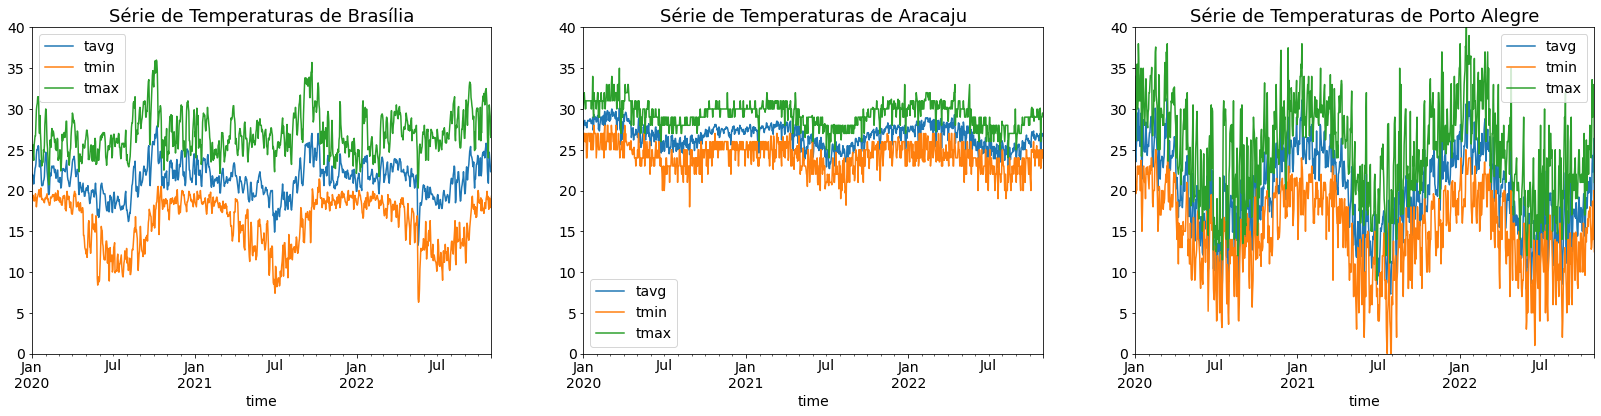

In [5]:
fig, axs = plt.subplots(1,3)
serie_brasilia.plot(y=['tavg', 'tmin', 'tmax'], ax=axs[0], title="Série de Temperaturas de Brasília", ylim=(0,40))
serie_aracaju.plot(y=['tavg', 'tmin', 'tmax'], ax=axs[1], title="Série de Temperaturas de Aracaju", ylim=(0,40))
serie_poa.plot(y=['tavg', 'tmin', 'tmax'], ax=axs[2], title="Série de Temperaturas de Porto Alegre", ylim=(0,40))
plt.show()

### 1. Simples

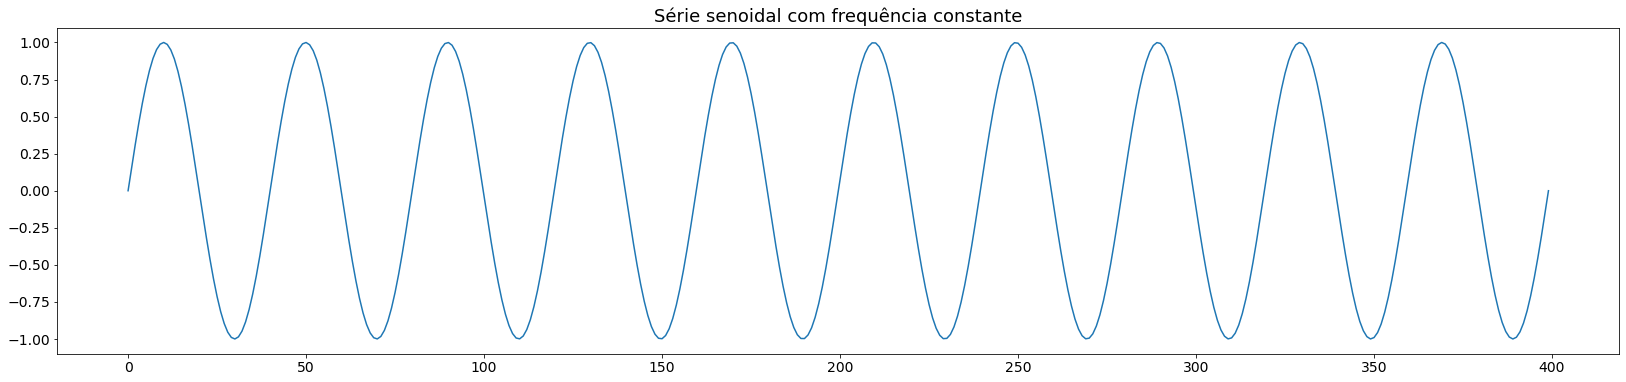

In [6]:
x = np.linspace(0, 2 * np.pi, 400)
sintetico = pd.Series(np.sin(x * 10))

_ = sintetico.plot(kind='line', title="Série senoidal com frequência constante")

### 2. Com Tendência

In [7]:
serie_dolar = pdr.get_data_yahoo("USDBRL=X", start="2007-01-01", end="2022-12-31")

[*********************100%***********************]  1 of 1 completed


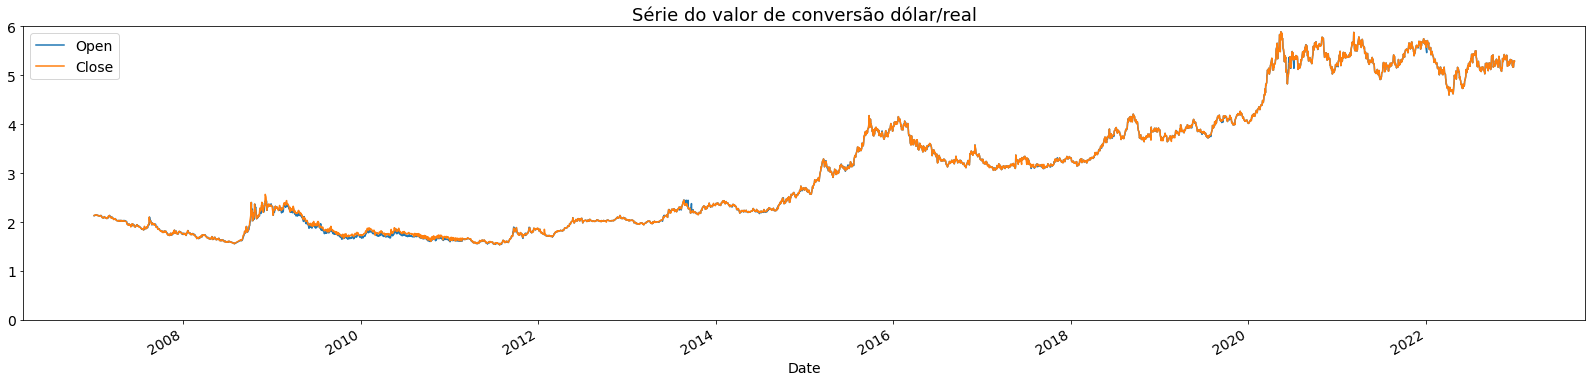

In [8]:
_ = serie_dolar.plot(y=['Open','Close'],title="Série do valor de conversão dólar/real", ylim=(0,6))

### 3. Com Sazonalidade

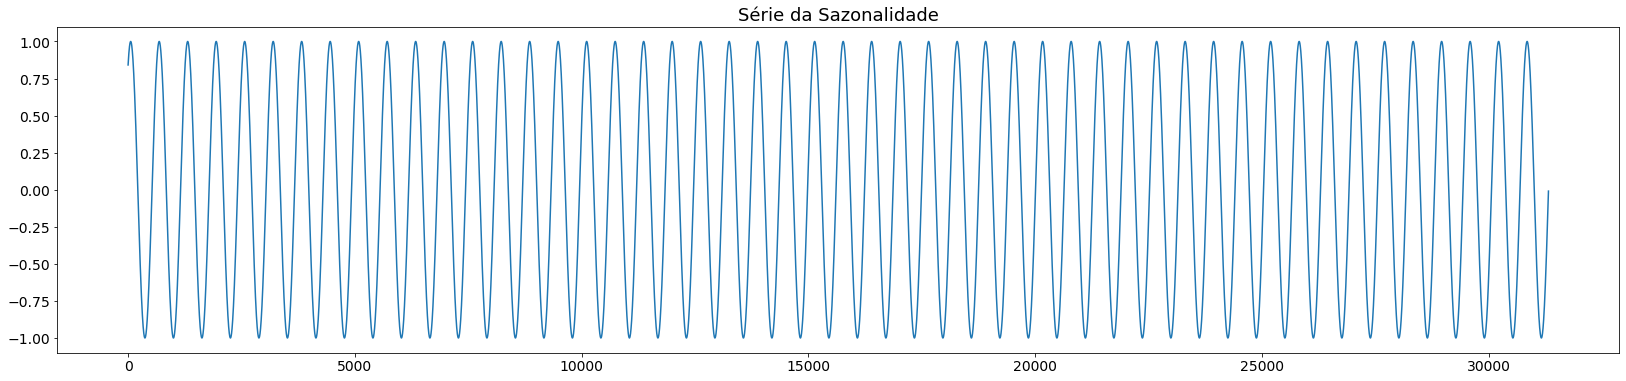

In [9]:
x = np.arange(1, 100 * np.pi, 0.01)
sintetico = pd.Series(np.sin(x))
_ = sintetico.plot(kind='line', title="Série da Sazonalidade")

In [10]:
start = datetime(2022, 1, 1)
end = datetime(2022, 6, 30)

location = Point(-30.1084987, -51.3172276) #Porto Alegre

poa_intradiaria = Hourly(location, start, end)
serie_intradiaria_poa = poa_intradiaria.fetch()

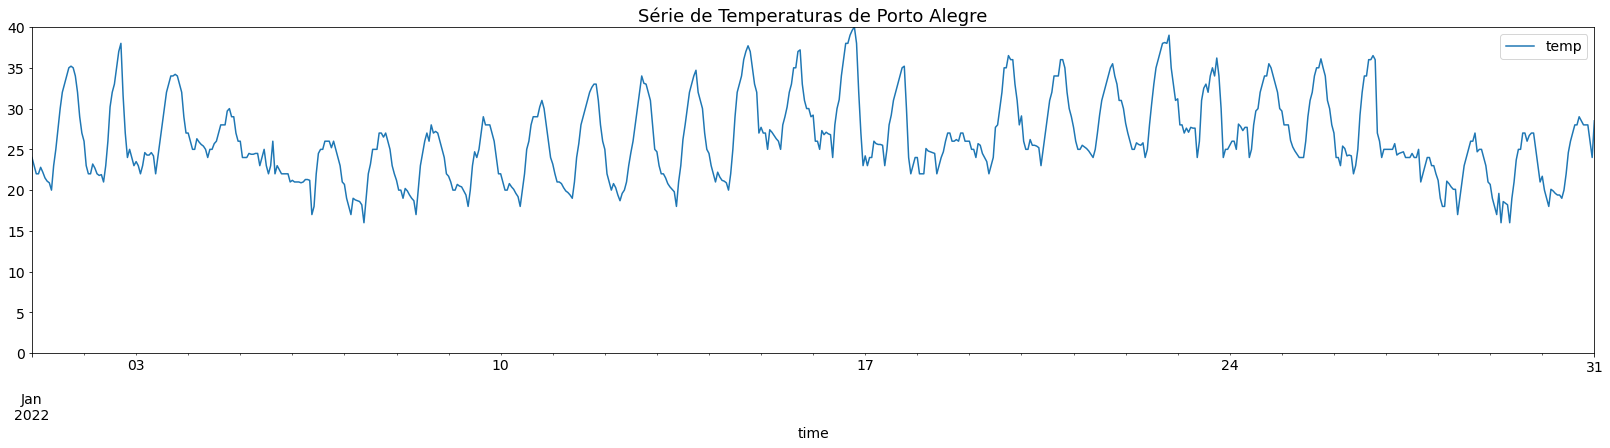

In [11]:
_ = serie_intradiaria_poa[(serie_intradiaria_poa.index >= "2022-01-01") & (serie_intradiaria_poa.index <= "2022-01-31")] \
        .plot(y=['temp'], title="Série de Temperaturas de Porto Alegre", ylim=(0,40))

### 4. Com Tendência e Sazonalidade

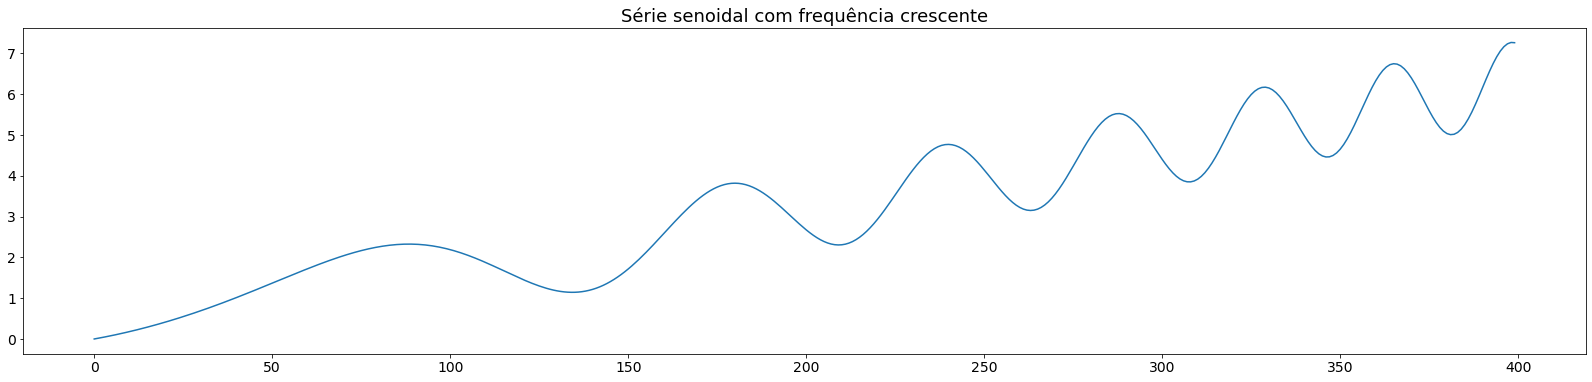

In [12]:
x = np.linspace(0, 2 * np.pi, 400)
sintetico = pd.Series(np.sin(x ** 2) + x)

_ = sintetico.plot(kind='line', title="Série senoidal com frequência crescente")

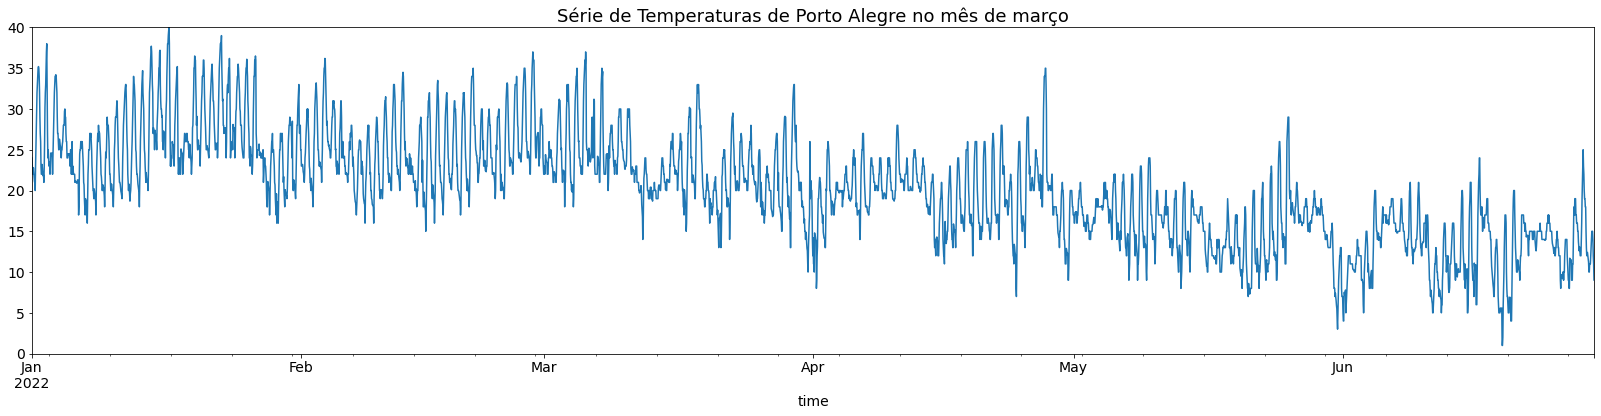

In [13]:
_ = serie_intradiaria_poa.temp.plot(title="Série de Temperaturas de Porto Alegre no mês de março", ylim=(0,40))

### 5. Mudanças abruptas / choques

In [14]:
serie_ibov = pdr.get_data_yahoo("^BVSP", start="2012-01-01", end="2022-12-31")

[*********************100%***********************]  1 of 1 completed


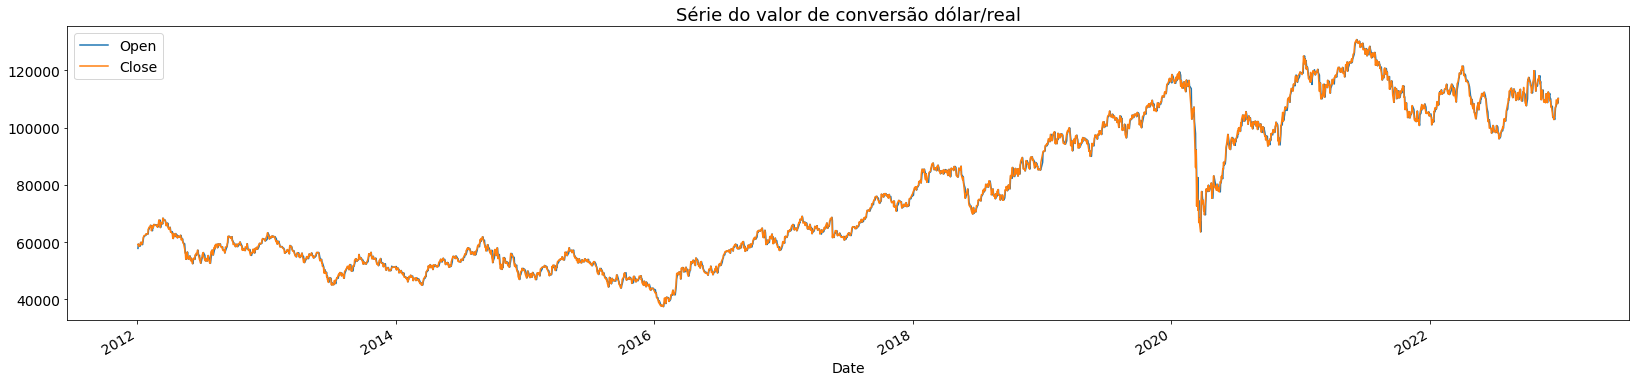

In [15]:
_ = serie_ibov.plot(y=['Open','Close'],title="Série do valor de conversão dólar/real")

### 6. Aleatórias

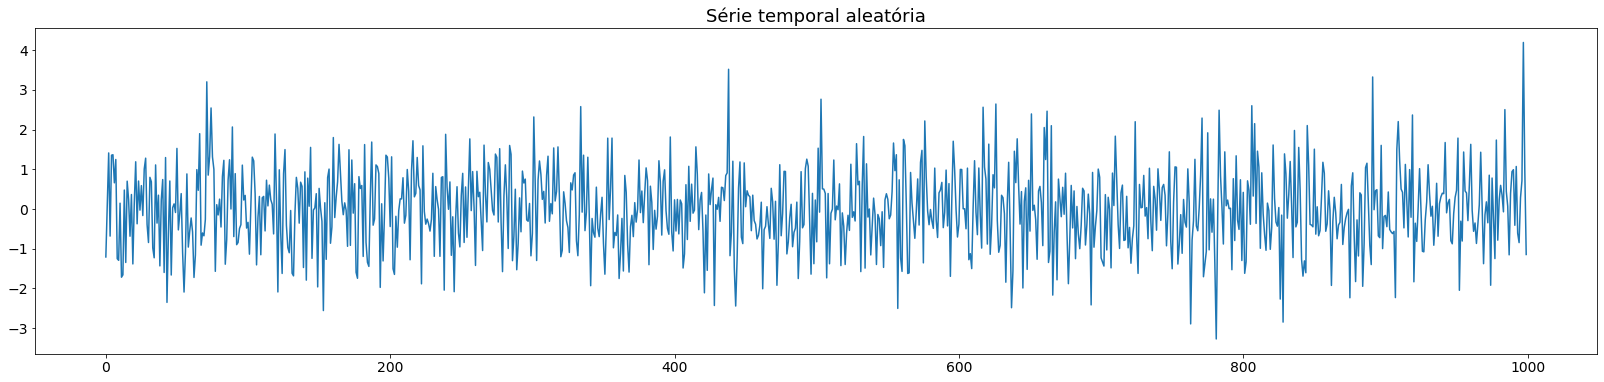

In [16]:
aleatorio = pd.Series(np.random.randn(1000))

_ = aleatorio.plot(kind='line', title="Série temporal aleatória")

## Estacionariedade

As características probabilísticas da série temporal não mudam com o tempo (fraca estacionariedade):
- A média $\mu$ é constante
- A variância $\sigma^2$ é constante
- A covariância $Cov(X_t,X_{t+h})$ (interdependência) depende apenas da diferença no tempo h entre duas medidas

<center>

![image](https://miro.medium.com/max/720/1*Xjnx_YEwAKMj4ooS8EjJ2A.webp)

Figura 1 - Ilustração dos princípios de estacionariedade. Fonte: [Data Driven Investor](https://medium.datadriveninvestor.com/time-series-and-trend-analysis-6a4f255f3d6e)
</center>

#### 1. Média $\mu$ constante

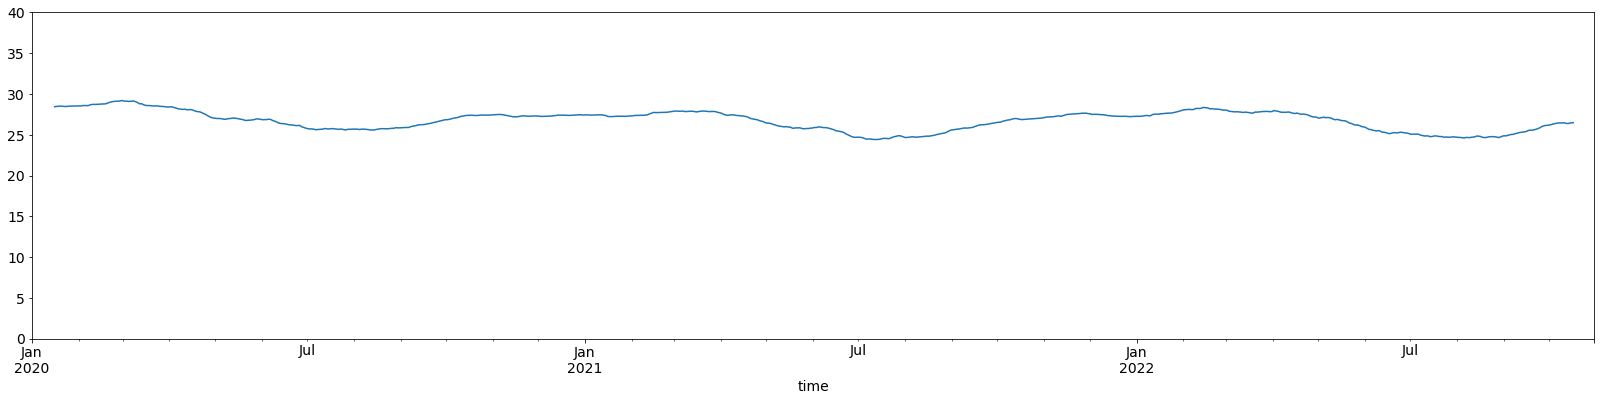

In [17]:
_ = serie_aracaju.tavg.rolling(30, center=True).mean().plot(ylim=(0,40))

#### 2. Variância $\sigma^{2}$ constante

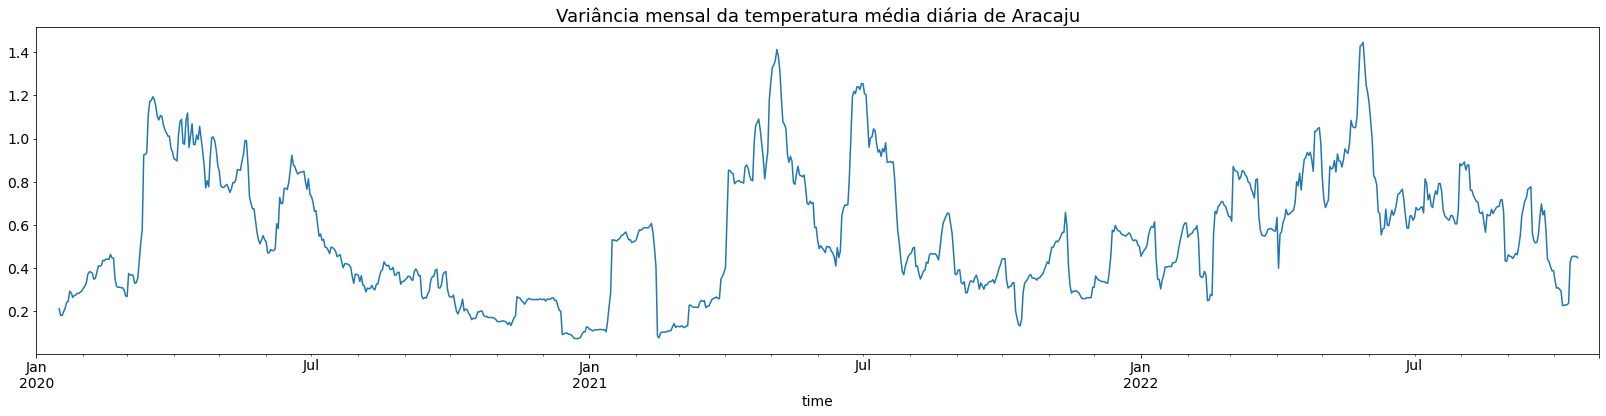

In [18]:
_ = serie_aracaju.tavg.rolling(30, center=True).var().plot(title="Variância mensal da temperatura média diária de Aracaju")

#### 3. Convariância
A Convariância ou variância conjunta $Cov(X_t,X_{t+h})$ é uma medida do grau de interdependência LINEAR entre duas variáveis aleatórias.
Ela, a covariância, é uma medida estatística onde é possível comparar duas variáveis, permitindo entender como elas se relacionam entre si.

\begin{align}
Cov(X_t,X_{t+h}) = \frac{\sum{(X_t - \overline{X_t}})(X_{t+h} - \overline{X_{t+h})}}{n}
\end{align}

Essa relação entre os ativos pode ser positiva ou negativa. Na covariância positiva, os ativos se movimentam de maneira parecida. Por outro lado, na covariância negativa eles se movimentam no sentido oposto. 

In [19]:
serie_aracaju['tavg_shift'] = serie_aracaju.tavg.shift(1)

In [20]:
serie_aracaju[["tavg","tavg_shift"]].cov()

,tavg,tavg_shift
tavg,1.921378,1.619735
tavg_shift,1.619735,1.923235


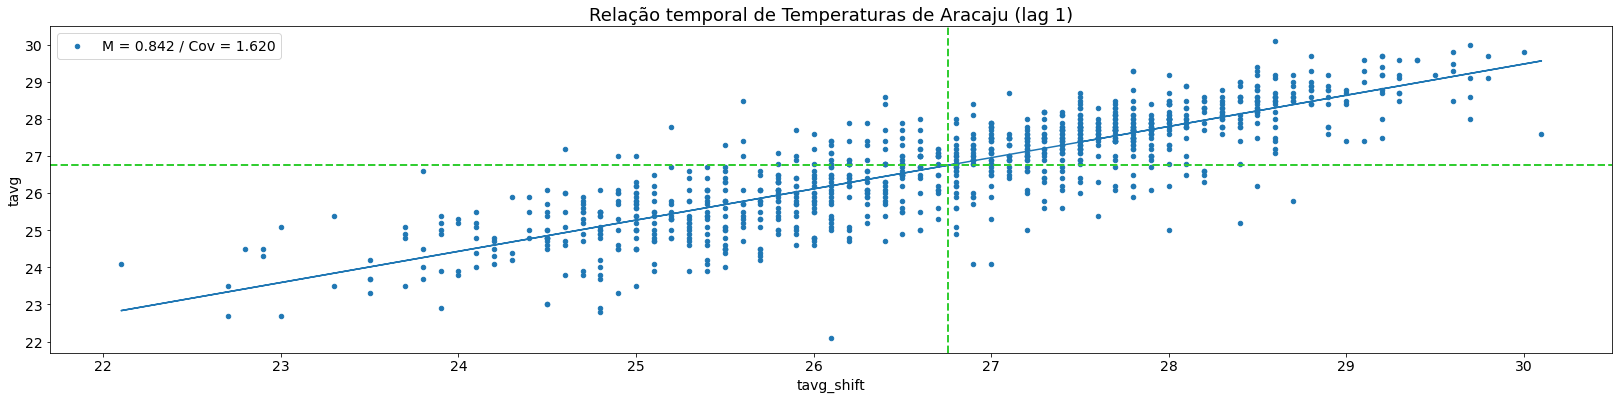

In [22]:
cov = serie_aracaju[["tavg","tavg_shift"]].cov().values[0,1]

m, b = np.polyfit(serie_aracaju.tavg_shift.values[1:], serie_aracaju.tavg.values[1:], 1)

serie_aracaju.plot(x="tavg_shift", y='tavg', title="Relação temporal de Temperaturas de Aracaju (lag 1)", kind='scatter', label=f"M = {m:.3f} / Cov = {cov:.3f}")

plt.plot(serie_aracaju.tavg_shift.values[1:], m*serie_aracaju.tavg_shift.values[1:] + b)

plt.axvline(serie_aracaju.tavg.mean(), color='limegreen', ls='--', lw=2)
_ = plt.axhline(serie_aracaju.tavg_shift.mean(), color='limegreen', ls='--', lw=2)

In [23]:
serie_aracaju['tavg_shift_10'] = serie_aracaju.tavg.shift(10)

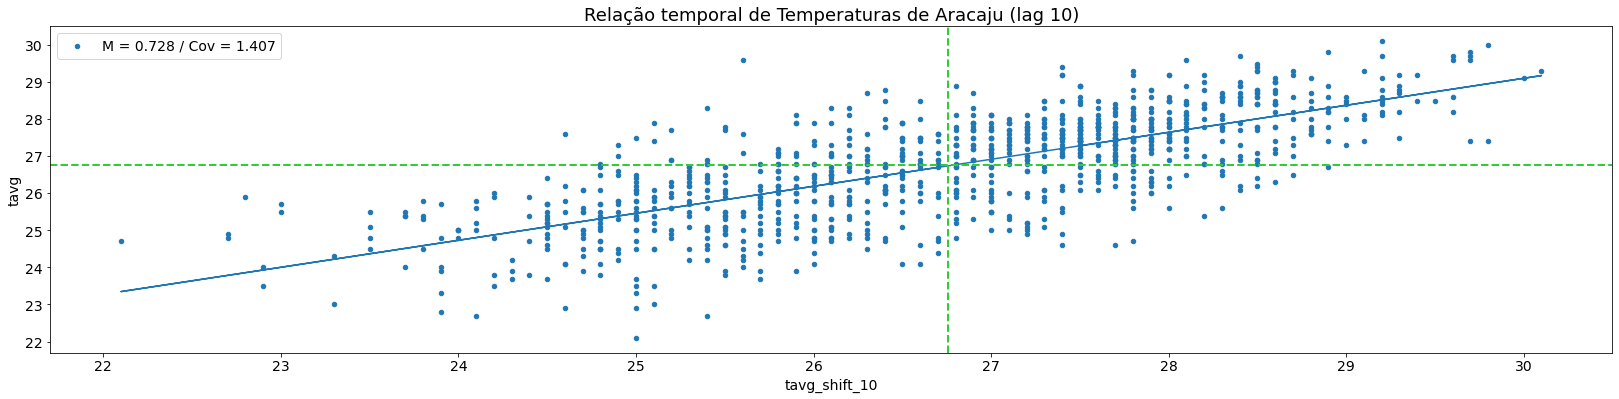

In [24]:
cov = serie_aracaju[["tavg","tavg_shift_10"]].cov().values[0,1]

m, b = np.polyfit(serie_aracaju.tavg_shift_10.values[10:], serie_aracaju.tavg.values[10:], 1)

serie_aracaju.plot(x="tavg_shift_10", y='tavg', title="Relação temporal de Temperaturas de Aracaju (lag 10)", kind='scatter', label=f"M = {m:.3f} / Cov = {cov:.3f}")

plt.plot(serie_aracaju.tavg_shift_10.values[10:], m*serie_aracaju.tavg_shift_10.values[10:] + b)

plt.axvline(serie_aracaju.tavg.mean(), color='limegreen', ls='--', lw=2)
_ = plt.axhline(serie_aracaju.tavg_shift_10.mean(), color='limegreen', ls='--', lw=2)

In [25]:
serie_aracaju['tavg_shift_30'] = serie_aracaju.tavg.shift(30)

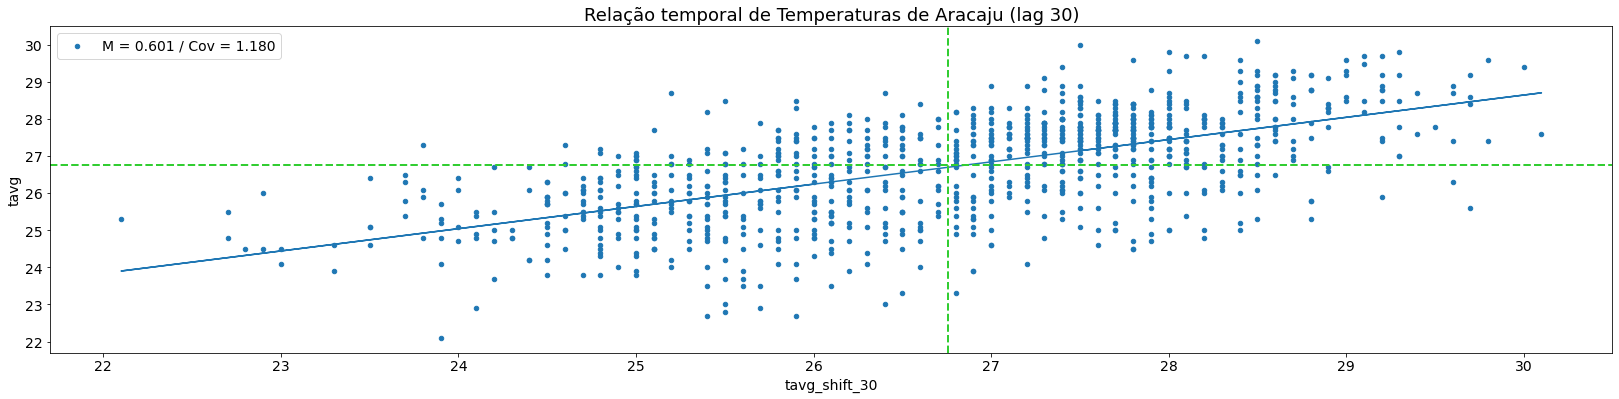

In [26]:
cov = serie_aracaju[["tavg","tavg_shift_30"]].cov().values[0,1]

m, b = np.polyfit(serie_aracaju.tavg_shift_30.values[30:], serie_aracaju.tavg.values[30:], 1)

serie_aracaju.plot(y='tavg',x="tavg_shift_30", title="Relação temporal de Temperaturas de Aracaju (lag 30)", kind='scatter', label=f"M = {m:.3f} / Cov = {cov:.3f}")

plt.plot(serie_aracaju.tavg_shift_30.values[30:], m*serie_aracaju.tavg_shift_30.values[30:] + b)

plt.axvline(serie_aracaju.tavg.mean(), color='limegreen', ls='--', lw=2)
_ = plt.axhline(serie_aracaju.tavg_shift_30.mean(), color='limegreen', ls='--', lw=2)

In [27]:
serie_aracaju[["tavg","tavg_shift","tavg_shift_10","tavg_shift_30"]].cov()

,tavg,tavg_shift,tavg_shift_10,tavg_shift_30
tavg,1.921378,1.619735,1.406753,1.179939
tavg_shift,1.619735,1.923235,1.409709,1.226742
tavg_shift_10,1.406753,1.409709,1.931142,1.301136
tavg_shift_30,1.179939,1.226742,1.301136,1.963462


#### Covariância e correlação
A covariância e a correlação são semelhantes. No entanto, elas possuem algumas diferenças. Primeiramente, os valores de covariância não são padronizados. Isso significa que a covariância pode variar entre menos infinito e mais infinito.

Sendo assim, os dados irão determinar o valor para uma relação linear ideal. Porém, os dados não são padronizados o que dificulta a determinação da relação entre as variáveis. 

Em contrapartida, na correlação os coeficientes são padronizados. Logo, o relacionamento linear perfeito resulta sempre em um coeficiente de correlação 1.

Portanto, a correlação mede não apenas a força mas também a direção da relação linear entre as variáveis. 

## Recomendações práticas:

- Realizar uma avaliação visual
- Criar um diagrama de autocorrelação
- Para séries temporais longas, separar a série em blocos iguais e checar se há similaridade entre as medidas, as variâncias e as covariâncias dos blocos

## Exercício


1. Exiba a série da **média de 30 dias** do índice bovespa e da taxa de câmbio dólar/real
2. Exiba a série da **variância de 30 dias** do índice bovespa e da taxa de câmbio dólar/real
3. Exiba a **relação temporal** do índice bovespa e da taxa de câmbio dólar/real